# Exxon Mobil Corporation (XOM)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
from utils.TechAnalysis import *

In [2]:
## Initializations
stock = 'XOM'
date_end = last_T(stock, 'data').strftime('%Y-%m-%d')
inp = '3M'   

In [3]:
## Load data and compute indicators:
data = pd.read_csv(os.path.join('data','{}.csv'.format(stock)), 
                 index_col='Date', parse_dates=True, na_values=['NaN'])

# Bollinger Bands
data['rolling_mean'], data['upper_band'], data['lower_band'] = bollinger_bands(data, price='Close', window=20, std=2) 
# Bollinger %B Value
data['%B'] = percB(data, price='Close')
# Stochastic Oscillator
data['%K'], data['%D'] = stocastic(data, price='Close', mode='slow', window=[14, 3, 3])
# RSI
data['RSI'] = RSI(data, price='Close', window=14)
# Volume Moving Average
data['Vol-MA'] = data['Volume'].rolling(window=25).mean()

In [4]:
date_start, date_end = timescale(inp, date_end)
df = reshape_df(data, date_start, date_end)

In [5]:
## from datetime to index for plotting
data_BB = indexTime(df[['rolling_mean','upper_band','lower_band']])  
data_B = indexTime(df['%B'])
df_KD = indexTime(df[['%K', '%D']])
df_RSI = indexTime(df[['RSI']])

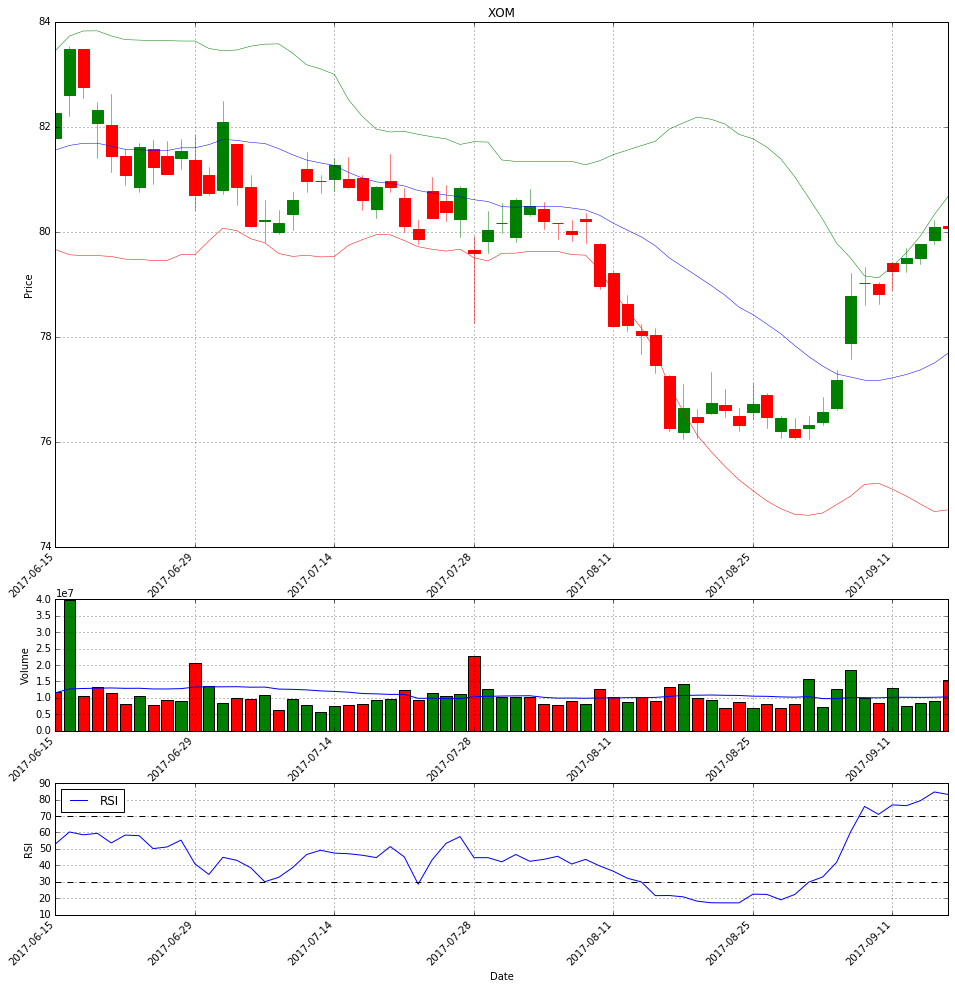

In [6]:
## Plot
fig, ax = plt.subplots(3,1, gridspec_kw = {'height_ratios':[4, 1, 1]}, sharex=True, figsize=(16,16)) 
# Subplot 1: Candlestick
ndays, date_strings, p1 = plot_candlestick(df, ax[0], price='Close', fmt='%Y-%m-%d', width=0.8)
# Subplot 1: Bollinger Bands
data_BB.plot(ax=ax[0], linewidth=0.5, legend=False)
# Subplot 2: Stocastic Oscillator
plot_Volume(df, ax[1])
#plot_index(df_KD, ax=ax[1], ylabel='Stocastic', lower_band=25.0, higher_band=75.0)
# Subplot 3: RSI
plot_index(df_RSI, ax=ax[2], ylabel='RSI', lower_band=30.0, higher_band=70.0)
set_plot_properties(ax, ndays, date_strings, stock, freq=10)

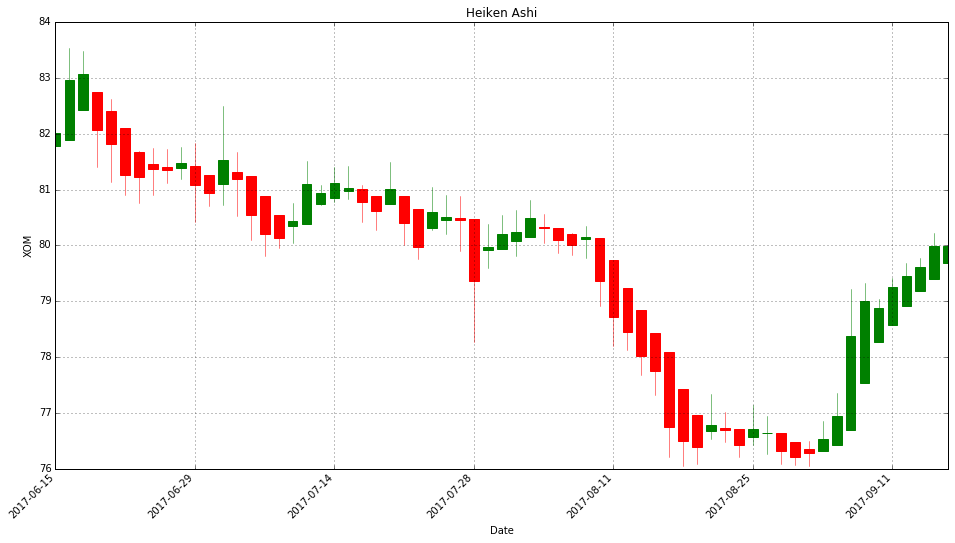

In [7]:
# Plot Heiken Ashi
fig, ax1 = plt.subplots(figsize=(16, 8))
ndays, date_strings, p1 = plot_HeikenAshi(df, ax1, price='Close', fmt='%Y-%m-%d', width=0.7)
set_plot_properties(ax1, ndays, date_strings, stock, freq=10)